In [63]:
from bs4 import BeautifulSoup
from selenium import webdriver
import requests
import time
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:

#numbers_needed = 20                              #自定義文章數
#initial_pausetime= 6                             #自定義等待網頁載入時間
#scroll_pausetime = 5                             #自定義爬蟲緩衝時間         
#url = "https://www.cupoy.com/newsfeed/topstory"  #熱門新聞網址

def crawer(numbers_needed,initial_pausetime,scroll_pausetime,url):
    
    #導入自動化執行網頁套件
    options = webdriver.ChromeOptions()
    
    #options.add_argument('--headless')         #讓瀏覽器執行在前景，而是在背景執行（不讓我們肉眼看得見）
    options.add_argument("--start-maximized")  #若不使用options.add_argument('--headless')，則打開視窗至全螢幕大小
    browser = webdriver.Chrome(options=options, executable_path='./chromedriver')
    
    browser.get(url)
        
    
    
    # 創建df來儲存資料
    columns = ['Type','Title','Abstract','URL']
    df = pd.DataFrame(columns =columns)
    
    time.sleep(initial_pausetime)
    FinalData = []
    last_height = browser.execute_script('return document.body.scrollHeight;')
    
    while True:
        html = browser.page_source
        soup = BeautifulSoup(html,'lxml')
        
        news_list = soup.find_all('div',class_='sc-eEieub sc-iuDHTM ibJqYc')
        for i,j in enumerate(news_list):
            try:
                Type = j.find('div',class_='sc-gacfCG bPSpUf').string
            except:
                Type = 'Nan'
                
            try:
                Title = j.find('a')['title']
            except:
                Title = 'Nan'
            
            try:
                Abs = j.find('p',class_='sc-FQuPU sc-ciodno bvnzOw').string
            except:
                Abs = 'Nan'
            
            try:
                URL = j.find('a')['href']
            except:
                URL = 'Nan'
       
            
            Data=[Type, Title, Abs, URL]
            
            if Title not in list(df['Title']):
                FinalData.append(Data)
            
        if len(FinalData) >= numbers_needed:    #當文章數達標則跳出迴圈 
            print('爬蟲結束')
            break
        
        browser.execute_script('window.scrollTo(0, document.body.scrollHeight);')   #下拉網頁
        
        time.sleep(scroll_pausetime)                                                #緩衝    
        
        new_height = browser.execute_script('return document.body.scrollHeight;')
        
        if new_height == last_height:            #網頁已下滑至最底部也跳出迴圈
            print("已沒有更多文章")
            break
        
        last_height = new_height
    
        print('-----------------')
        print('更新中')
    
    print('-----------------')
    browser.quit()
    df = pd.DataFrame(FinalData[:numbers_needed] ,columns =columns)
    return df

In [38]:
crawer(numbers_needed=500,initial_pausetime=6,scroll_pausetime=5,url="https://www.cupoy.com/newsfeed/topstory")

-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
-----------------
更新中
爬蟲結束
-----------------
爬蟲結束


,Type,Title,Abstract,URL
0,Fintech金融科技,「悠遊付」App 即將上線，用手機就能「嗶」進捷運、搭公車等四大功能、上線時間搶先看 | T...,悠遊卡公司全新推出的電子支付「悠遊付」Easy Wallet App 即將全面啟動，只需綁定...,https://technews.tw/2020/02/24/easy-wallet-app...
1,科技,鴻海鄭州廠傳復工數逾 2 萬人，獎金升到 3.02 萬元 | TechNews 科技新報,鴻海中國鄭州廠區加速復工。中國媒體報導，21 日擴大加發激勵獎金後，鄭州富士康在廠員工已突破...,https://technews.tw/2020/02/24/foxconn-work-bo...
2,蘋果專區,蘋果積極投入 5G 手機開發，AiP 模組將成為下一步關鍵 | TechNews 科技新報,市場上已有消息指出，手機大廠蘋果針對 5G 通訊領域，將於 2020 年 9 月推出首款 S...,https://technews.tw/2020/02/24/apple-5g-aip/?u...
3,Engadget,Netflix 首部獨家《變形金剛》動畫預告正式上線,去年 2 月的時侯，Netflix 宣佈將與孩之寶（Hasbro）攜手合作推出《變形金剛》動...,https://chinese.engadget.com/chinese-2020-02-2...
4,換日線 Crossing,南韓抗疫為何急轉直下：總統文在寅「過於親中」？新天地教會「邪教害人」？還是民眾防疫概念不夠？...,武漢肺炎疫情擴散全球，每天的新聞都是哪裡又新增了多少病例。而近來除了臺灣以外，大家最關心的疫...,https://crossing.cw.com.tw/article/13018?utm_s...
5,醫療健康,【孩子出生就沒眼鼻】汙染死亡率全球第 7！南蘇丹爆發環境危機，政府卻因「1 關鍵」無視畸形兒...,【我們為什麼挑選這篇文章】 石油是現階段全球使用最廣泛的原物料，也是工業社會中重要的動力燃料...,https://buzzorange.com/2020/02/24/environmenta...
6,財經,【德智庫：武漢肺炎是全球經濟最大威脅】比中美貿易戰、英國脫歐更慘！主計總處曝 2 原因讓臺產...,【我們為什麼選擇這篇文章？】 武漢肺炎疫情迫使中國廠商停工，導致全球供應鏈面臨斷鏈風險，不僅...,https://buzzorange.com/2020/02/24/wuhan-virus-...
7,國際,【美國可能以「東亞北約」牽制中共】美前印太司令看穿中共「尚未武力犯臺」原因，並示警將與東亞國...,【我們為什麼選擇這篇文章？】 適逢中國境內武漢肺炎疫情蔓延，中國政府仍不忘以武力威嚇臺灣，接...,https://buzzorange.com/2020/02/24/east-asian-n...
8,BuzzOrange 報橘,【民眾覺得我們很煩】電話不離手、張羅三餐還要扮「張老師」！防疫員遭隔離民眾惡言相向「擦淚繼續...,【我們為什麼要挑選這篇文章】 武漢肺炎疫情在臺灣持續延燒，臺北和南投都傳出有居家檢疫者在外「...,https://buzzorange.com/2020/02/24/a-day-of-epi...
9,Engadget,Realme X50 Pro 是一款力求全面的 5G 旗艦,在 CES 期間才剛剛發表了 X50 的 Realme，今天又帶來了原計畫要在 MWC 上公...,https://chinese.engadget.com/chinese-2020-02-2...


In [48]:
numbers_needed = 500                              #自定義文章數
initial_pausetime= 6                             #自定義等待網頁載入時間
scroll_pausetime = 5                             #自定義爬蟲緩衝時間         
url = "https://www.cupoy.com/newsfeed/topstory"  #熱門新聞網址



options = webdriver.ChromeOptions()

#options.add_argument('--headless')         #讓瀏覽器執行在前景，而是在背景執行（不讓我們肉眼看得見）
options.add_argument("--start-maximized")  #若不使用options.add_argument('--headless')，則打開視窗至全螢幕大小
browser = webdriver.Chrome(options=options, executable_path='./chromedriver')

browser.get(url)
    
    

# 創建df來儲存資料
columns = ['Type','Title','Abstract','URL']
df = pd.DataFrame(columns =columns)

time.sleep(initial_pausetime)
FinalData = []
last_height = browser.execute_script('return document.body.scrollHeight;')

while True:
    html = browser.page_source
    soup = BeautifulSoup(html,'lxml')
    
    news_list = soup.find_all('div',class_='sc-eEieub sc-iuDHTM ibJqYc')
    for i,j in enumerate(news_list):
        try:
            Type = j.find('div',class_='sc-gacfCG bPSpUf').string
        except:
            Type = 'Nan'
            
        try:
            Title = j.find('a')['title']
        except:
            Title = 'Nan'
        
        try:
            Abs = j.find('p',class_='sc-FQuPU sc-ciodno bvnzOw').string
        except:
            Abs = 'Nan'
        
        try:
            URL = j.find('a')['href']
        except:
            URL = 'Nan'
        Data=[Type, Title, Abs, URL]
        
        if Title not in list(df['Title']):
            FinalData.append(Data)        
    if len(FinalData) >= numbers_needed:    #當文章數達標則跳出迴圈 
        print('爬蟲結束')
        break  
    browser.execute_script('window.scrollTo(0, document.body.scrollHeight);')   #下拉網頁
    
    time.sleep(scroll_pausetime)                                                #緩衝    
    
    new_height = browser.execute_script('return document.body.scrollHeight;')
    
    if new_height == last_height:            #網頁已下滑至最底部也跳出迴圈
        print("已沒有更多文章")
        break
    last_height = new_height
    print('-----------------')
    print('更新中')

print('-----------------')
browser.quit()
df = pd.DataFrame(FinalData[:numbers_needed] ,columns =columns)
df

-----------------
更新中
爬蟲結束
-----------------


,Type,Title,Abstract,URL
0,BuzzOrange 報橘,【有料八卦】解密臺灣宮廟黑幕：如何用「宗教＋黑道＋黨國樁腳」完美洗錢 | BuzzOrange,【為什麼挑選這篇文章】 《BO》先前曾在 一篇文章中提到 ，過去日本時代宗教環境相對單純，然...,https://buzzorange.com/2017/07/24/how-taiwan-t...
1,Fintech金融科技,「悠遊付」App 即將上線，用手機就能「嗶」進捷運、搭公車等四大功能、上線時間搶先看 | T...,悠遊卡公司全新推出的電子支付「悠遊付」Easy Wallet App 即將全面啟動，只需綁定...,https://technews.tw/2020/02/24/easy-wallet-app...
2,科技,鴻海鄭州廠傳復工數逾 2 萬人，獎金升到 3.02 萬元 | TechNews 科技新報,鴻海中國鄭州廠區加速復工。中國媒體報導，21 日擴大加發激勵獎金後，鄭州富士康在廠員工已突破...,https://technews.tw/2020/02/24/foxconn-work-bo...
3,蘋果專區,蘋果積極投入 5G 手機開發，AiP 模組將成為下一步關鍵 | TechNews 科技新報,市場上已有消息指出，手機大廠蘋果針對 5G 通訊領域，將於 2020 年 9 月推出首款 S...,https://technews.tw/2020/02/24/apple-5g-aip/?u...
4,Google專區,華為 Mate Xs 加強了轉軸，但仍沒有補上 Google 服務,雖然在去年的 MWC 時華為就端出了自己的第一款摺疊螢幕手機 Mate X，但時至今日，真正...,https://chinese.engadget.com/chinese-2020-02-2...
5,職涯,為何人文學系訓練出的人才，在科技當道的時代成為解決「棘手問題」的關鍵人物？ ｜ 薛晴／讀者投...,首先，必須先清楚釐清「棘手問題」的定義及其本質。根據德國教授 Horst Rittel 和他...,https://crossing.cw.com.tw/article/13019?utm_s...
6,無人駕駛,MIT 用地表穿透雷達幫助自駕車「看穿」雪與霧,自駕車技術近年來進步神速，但是光學相機與 LIDAR 的組合依然是只有在天氣晴朗、路況完美時...,https://chinese.engadget.com/chinese-2020-02-2...
7,財經,【德智庫：武漢肺炎是全球經濟最大威脅】比中美貿易戰、英國脫歐更慘！主計總處曝 2 原因讓臺產...,【我們為什麼選擇這篇文章？】 武漢肺炎疫情迫使中國廠商停工，導致全球供應鏈面臨斷鏈風險，不僅...,https://buzzorange.com/2020/02/24/wuhan-virus-...
8,國際,【美國可能以「東亞北約」牽制中共】美前印太司令看穿中共「尚未武力犯臺」原因，並示警將與東亞國...,【我們為什麼選擇這篇文章？】 適逢中國境內武漢肺炎疫情蔓延，中國政府仍不忘以武力威嚇臺灣，接...,https://buzzorange.com/2020/02/24/east-asian-n...
9,BuzzOrange 報橘,【民眾覺得我們很煩】電話不離手、張羅三餐還要扮「張老師」！防疫員遭隔離民眾惡言相向「擦淚繼續...,【我們為什麼要挑選這篇文章】 武漢肺炎疫情在臺灣持續延燒，臺北和南投都傳出有居家檢疫者在外「...,https://buzzorange.com/2020/02/24/a-day-of-epi...


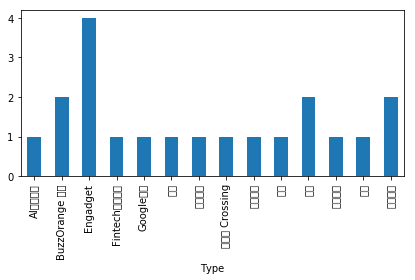

In [65]:
df.groupby('Type').count()['Title'].plot.bar()
plt.tight_layout()

In [68]:
df.groupby('Type').size()

Type
AI與大數據           1
BuzzOrange 報橘    2
Engadget         4
Fintech金融科技      1
Google專區         1
國際               1
手機平板             1
換日線 Crossing     1
無人駕駛             1
科技               1
職涯               2
蘋果專區             1
財經               1
醫療健康             2
dtype: int64

In [74]:
df['Type']

0     BuzzOrange 報橘
1       Fintech金融科技
2                科技
3              蘋果專區
4          Google專區
5                職涯
6              無人駕駛
7                財經
8                國際
9     BuzzOrange 報橘
10         Engadget
11     換日線 Crossing
12             醫療健康
13             醫療健康
14         Engadget
15           AI與大數據
16         Engadget
17         Engadget
18             手機平板
19               職涯
Name: Type, dtype: object

In [73]:
df.groupby('Type').count()

,Title,Abstract,URL
Type,,,
AI與大數據,1,1,1
BuzzOrange 報橘,2,2,2
Engadget,4,4,4
Fintech金融科技,1,1,1
Google專區,1,1,1
國際,1,1,1
手機平板,1,1,1
換日線 Crossing,1,1,1
無人駕駛,1,1,1
